### Quantum Econophysics 

Econophysics is an interdisciplinary field that applies concepts from physics, particularly statistical mechanics and quantum mechanics, to understand economic phenomena. The field emerged in the mid-1990s, driven by physicists who sought to apply the mathematical rigor and tools of their discipline to economic systems. These systems, like physical systems, involve many interacting components and exhibit complex, emergent behavior. By leveraging the principles of physics, econophysics aims to provide new insights into markets, wealth distribution, and other economic processes.

One of the key areas where econophysics has been particularly influential is in the study of wealth distribution. Traditional economic models often assume that wealth distribution follows a normal distribution. However, empirical data shows that wealth distribution in real-world economies is typically more skewed, with a small percentage of the population holding a disproportionately large share of the wealth. This distribution more closely follows a power law, a concept well understood in physics.

In the realm of econophysics, a model based on the power law distribution can be used to simulate how wealth is distributed among agents in an economy. This model assumes that agents engage in transactions that result in the redistribution of wealth, with the rich getting richer and the poor getting poorer, a phenomenon often referred to as the "Matthew Effect." By simulating these transactions, the model can reproduce the characteristic heavy-tailed distribution observed in real economies.

To illustrate this, one can model a simple economy using a quantum circuit, where the wealth of each agent is represented by a quantum state. The quantum nature of the model allows for the representation of complex interactions between agents, capturing the probabilistic nature of wealth distribution. In a quantum-inspired econophysics model, the wealth distribution can be encoded in the amplitudes of a quantum state, and the evolution of the economy can be simulated as a quantum process.

By using tools from quantum computing, such as the AerSimulator from Qiskit, researchers can simulate the quantum state of the economy and analyze the resulting distribution. The simulation provides a statevector that represents the distribution of wealth across the agents in the economy. Visualizing this quantum state on a Bloch sphere or through histograms can reveal the underlying patterns and correlations in the wealth distribution, providing deeper insights into the dynamics of economic systems.

The quantum approach to econophysics is still in its early stages, but it holds promise for advancing our understanding of complex economic phenomena. By incorporating quantum mechanics into economic models, researchers hope to capture the subtle interactions and correlations that classical models may overlook. As quantum computing technology continues to evolve, it may offer new methods for simulating and analyzing large-scale economic systems, leading to more accurate predictions and a better understanding of economic behavior.

Looking forward, the integration of quantum mechanics into econophysics could lead to breakthroughs in how we model and understand economic systems. It may also inspire new approaches to addressing economic inequality and optimizing resource distribution. As the field of quantum computing matures, its applications in econophysics are likely to expand, offering new tools for tackling some of the most pressing challenges in economics today.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import powerlaw
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from qiskit_aer import AerSimulator
from qiskit.quantum_info import Statevector

%matplotlib inline

In [2]:
# Parameters
a = 1.5  # Power law exponent
num_agents = 1024  # Number of agents (must be a power of 2)
initial_wealth = 100  # Initial wealth for each agent
num_transactions = 100000  # Number of transactions

In [3]:
# Initialize wealth distribution
wealth = np.full(num_agents, initial_wealth)

In [4]:
# Perform transactions
for _ in range(num_transactions):
    i, j = np.random.choice(num_agents, 2, replace=False)
    transaction_amount = min(wealth[i], wealth[j]) * np.random.random()
    if np.random.random() < 0.5:
        wealth[i] += transaction_amount
        wealth[j] -= transaction_amount
    else:
        wealth[i] -= transaction_amount
        wealth[j] += transaction_amount

(array([6.87953920e-03, 1.08282359e-04, 3.60941196e-05, 5.05317674e-05,
        3.60941196e-05, 2.16564718e-05, 2.16564718e-05, 1.44376478e-05,
        2.16564718e-05, 2.88752957e-05, 2.16564718e-05, 2.88752957e-05,
        0.00000000e+00, 2.16564718e-05, 1.44376478e-05, 7.21882392e-06,
        7.21882392e-06, 0.00000000e+00, 0.00000000e+00, 7.21882392e-06,
        0.00000000e+00, 0.00000000e+00, 1.44376478e-05, 0.00000000e+00,
        0.00000000e+00, 1.44376478e-05, 7.21882392e-06, 7.21882392e-06,
        7.21882392e-06, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.21882392e-06, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 7.21882392e-06]),
 array([   0.  ,  135.28,  270.56,  405.84,  541.12,  676.4 ,  811.68,
         946.96, 1082.2

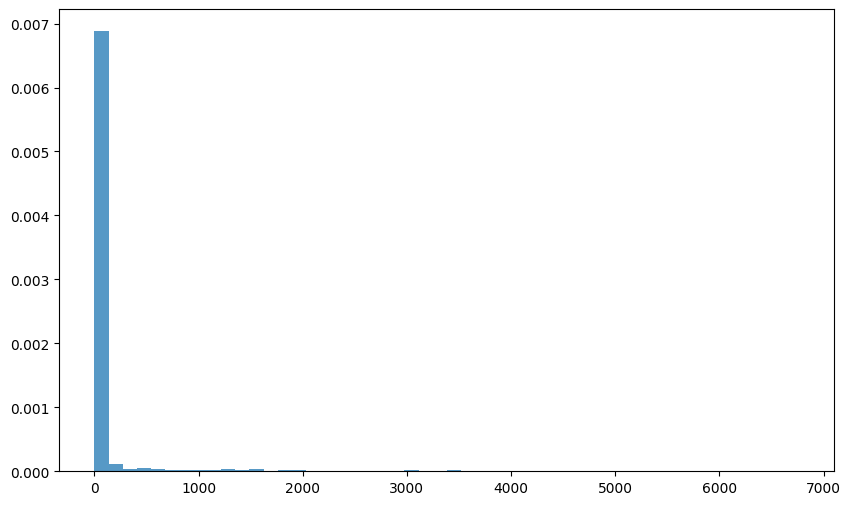

In [5]:
# Plot the wealth distribution
plt.figure(figsize=(10, 6))
plt.hist(wealth, bins=50, density=True, alpha=0.75, label='Wealth Distribution')

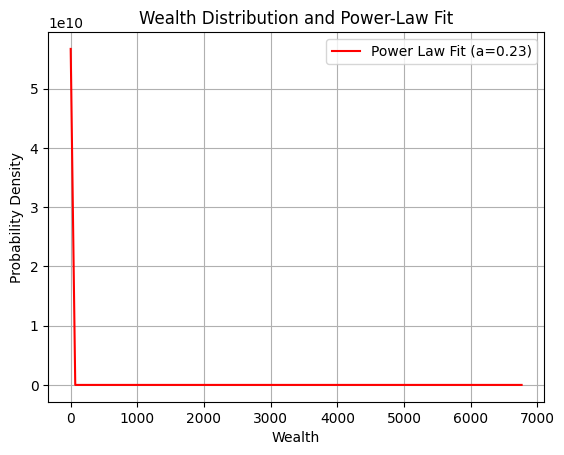

In [6]:
# Fit and plot the power-law distribution
xmin = 1  # Minimum wealth value to consider
fitted_params = powerlaw.fit(wealth[wealth >= xmin])
x = np.linspace(xmin, wealth.max(), 100)
pdf = powerlaw.pdf(x, *fitted_params)

plt.plot(x, pdf, 'r-', label=f'Power Law Fit (a={fitted_params[0]:.2f})')
plt.xlabel('Wealth')
plt.ylabel('Probability Density')
plt.title('Wealth Distribution and Power-Law Fit')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# Quantum Circuit to represent the wealth distribution
num_qubits = int(np.log2(num_agents))
qc = QuantumCircuit(num_qubits)

In [8]:
# Map wealth distribution to a quantum state
normalized_wealth = wealth / wealth.sum()
state_vector = np.sqrt(normalized_wealth)

In [9]:
# Initialize quantum state
qc.initialize(state_vector, range(num_qubits))
qc.save_statevector()

In [10]:
# Simulate using AerSimulator
simulator = AerSimulator(method='statevector')

In [11]:
# Transpile the circuit for the simulator
qc = transpile(qc, simulator)

In [12]:
# Execute the circuit and get the statevector
result = simulator.run(qc).result()
statevector = result.get_statevector(qc)

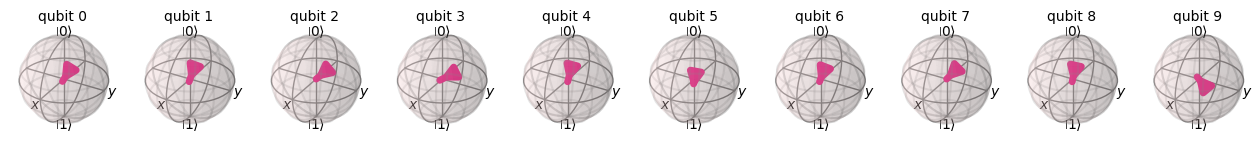

In [13]:
# Plot Bloch Sphere and Histogram
plot_bloch_multivector(statevector)
plt.show()


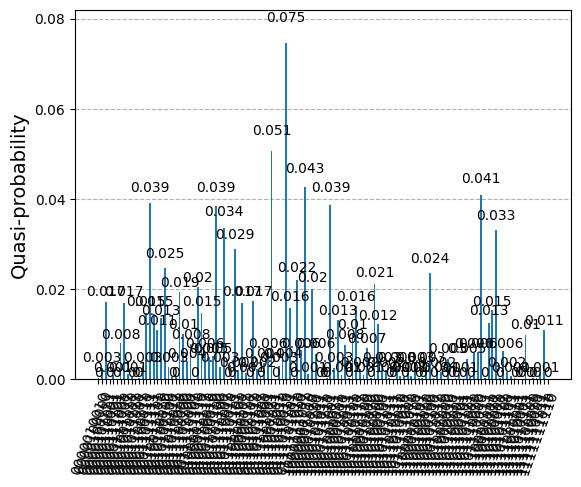

In [14]:
counts = Statevector(statevector).probabilities_dict()
plot_histogram(counts)
plt.show()